In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [15]:
df = pd.read_csv('canada_per_capita_income.csv')
print(df.head())


   year  per capita income (US$)
0  1970              3399.299037
1  1971              3768.297935
2  1972              4251.175484
3  1973              4804.463248
4  1974              5576.514583


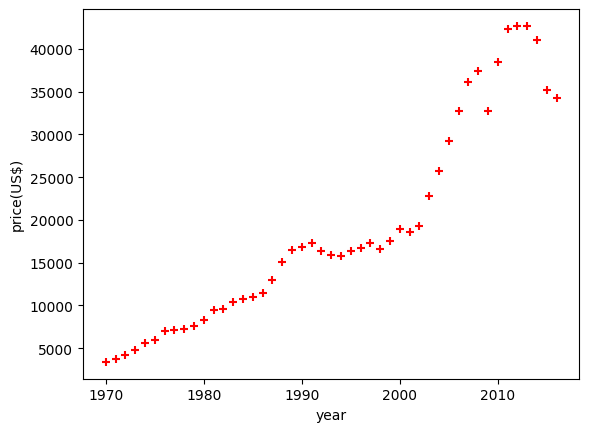

In [7]:
plt.xlabel('year')
plt.ylabel('price(US$)')
plt.scatter(df['year'], df['per capita income (US$)'], color="red", marker='+')


In [16]:
reg = linear_model.LinearRegression()

In [22]:
reg.fit(df[['year']], df['per capita income (US$)'])
prediction = reg.predict([[2020]])
print("Predicted income for 2020:", prediction)

Predicted income for 2020: [41288.69409442]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [18]:
reg.coef_

array([828.46507522])

In [19]:
reg.intercept_

np.float64(-1632210.7578554575)

In [23]:
dff=pd.read_csv("hiring.csv")
dff

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [34]:
import math as m
med_score=m.floor(dff['test_score(out of 10)'].median())
print(med_score)

8


In [35]:
dff['test_score(out of 10)']=dff['test_score(out of 10)'].fillna(med_score)

In [30]:
dff

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,8.0,7,72000
7,eleven,7.0,8,80000


In [36]:
!pip install word2number

  Preparing metadata (setup.py) ... done
  Created wheel for word2number: filename=word2number-1.1-py3-none-any.whl size=5568 sha256=d349d324ab79dad0dacc742487927b74e50fd9707e6d5c976d6c627d83b1fc90
  Stored in directory: /root/.cache/pip/wheels/5b/79/fb/d25928e599c7e11fe4e00d32048cd74933f34a74c633d2aea6
Successfully built word2number


In [42]:
import numpy as np
from word2number import w2n
for i in range(len(dff['experience'])):
    if str(dff['experience'].iloc[i]).lower() == 'nan':
        dff.at[i, 'experience'] = 'zero'
def safe_word_to_num(val):
    try:
        return w2n.word_to_num(str(val))
    except ValueError:
        return 0  # or other default value

dff['experience'] = dff['experience'].apply(safe_word_to_num)


In [43]:
med_exp=m.floor(dff['experience'].median())
dff['experience']=dff['experience'].fillna(med_exp)

In [44]:
dff

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [45]:
reg=linear_model.LinearRegression()
reg.fit(dff[['experience','test_score(out of 10)','interview_score(out of 10)']],dff['salary($)'])

LinearRegression()

In [47]:
reg.predict([[12,10,10]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([92002.18340611])

In [50]:
gd=pd.read_csv('test_scores.csv')
gd

,name,math,cs
0,david,92,98
1,laura,56,68
2,sanjay,88,81
3,wei,70,80
4,jeff,80,83
5,aamir,49,52
6,venkat,65,66
7,virat,35,30
8,arthur,66,68
9,paul,67,73


In [52]:
x=np.array(gd['math'])
y=np.array(gd['cs'])

In [59]:
def gradient_descent(x,y):
  learning_rate=0.0002
  m_curr=b_curr=0
  iterations=1000000
  n=len(x)

  for i in range(iterations):
    y_predicted=m_curr*x+b_curr
    cost=(1/n)*sum([val**2 for val in (y-y_predicted)] )
    md=-(2/n)*sum(x*(y-y_predicted))
    bd=-(2/n)*sum(y-y_predicted)
    m_curr=m_curr-learning_rate*md
    b_curr=b_curr-learning_rate*bd
    print("m{},b{},iterations{},cost{}".format(m_curr,b_curr,i,cost))
gradient_descent(x,y)

Streaming output truncated to the last 5000 lines.
m1.0177362378601513,b1.9152193109288085,iterations995000,cost31.604511333529576
m1.017736237860151,b1.9152193109288138,iterations995001,cost31.604511333529572
m1.0177362378601509,b1.9152193109288191,iterations995002,cost31.604511333529583
m1.017736237860151,b1.9152193109288245,iterations995003,cost31.604511333529594
m1.0177362378601509,b1.9152193109288298,iterations995004,cost31.604511333529583
m1.0177362378601509,b1.9152193109288351,iterations995005,cost31.604511333529583
m1.0177362378601509,b1.9152193109288405,iterations995006,cost31.604511333529587
m1.0177362378601507,b1.9152193109288458,iterations995007,cost31.604511333529622
m1.0177362378601507,b1.9152193109288511,iterations995008,cost31.604511333529572
m1.0177362378601507,b1.9152193109288564,iterations995009,cost31.604511333529572
m1.0177362378601502,b1.9152193109288618,iterations995010,cost31.604511333529583
m1.0177362378601507,b1.915219310928867,iterations995011,cost31.60451133